<a href="https://colab.research.google.com/github/EricLi-Dev/MachineLearning/blob/main/Tinygrad_NN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tinygrad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 695.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.2 MB/s eta 0:00:00


## Imports

In [2]:
import numpy as np
from tinygrad.helpers import Timing

## Tensors
Base data structure in tinygrad. Can be thought of as a multidimensional array of a specific data type. All operations in tinygrad operate on these tensors

In [3]:
from tinygrad.tensor import Tensor

### Tensors from python list or numpy ndarray

In [11]:
t1 = Tensor([1, 2, 3, 4, 5]) # Python list

na = np.array([1, 2, 3, 4, 5]) # Numpy ndarray
t2 = Tensor(na)

print(t1.numpy())
print(t2.numpy())

[1 2 3 4 5]
[1 2 3 4 5]


### Tensors from tinygrad factory methods

In [12]:
full = Tensor.full(shape=(2, 3), fill_value = 5) # Create a Tensor of shape (2, 3) filled w/ 5s
zeros = Tensor.zeros(2, 3) # Create a Tensor of shape (2, 3) filled w/ 0s
ones = Tensor.ones(2, 3) # Create a Tensor of shape (2, 3) filled w/ 1s

print(full.numpy())
print(zeros.numpy())
print(ones.numpy())

[[5 5 5]
 [5 5 5]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


In [13]:
full_like = Tensor.full_like(full, fill_value = 2) # Create a Tensor of the same shape as full filled w/ 2s
zeros_like = Tensor.zeros_like(full) # Create a Tensor of the same shape as full filled w/ 0s
ones_like = Tensor.ones_like(full) # Create a Tensor of the same shape as full filled w/ 1s

print(full_like.numpy())
print(zeros_like.numpy())
print(ones_like.numpy())

[[2 2 2]
 [2 2 2]]
[[0 0 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]]


In [16]:
eye = Tensor.eye(3) # Create a 3x3 identity matrix
print(eye.numpy())

arange = Tensor.arange(start = 0, stop = 10, step = 1) # create a tensor of shape (10, ) filled w/ vals from 0 to 9
print(arange.numpy())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[0 1 2 3 4 5 6 7 8 9]


In [18]:
rand = Tensor.rand(2, 3) # Create a Tensor of shape (2, 3) filled w/ rand values from a uniform distribution
randn = Tensor.randn(2, 3) # Create a Tensor of shape (2, 3) filled w/ rand values from a normal distribution
uniform = Tensor.uniform(2, 3, low = 0, high = 10) # Create a Tensor of shape (2, 3) w/ rand values from a uniform distribution between 0 and 10

print(rand.numpy())
print(randn.numpy())
print(uniform.numpy())

[[0.82972926 0.00256044 0.5747454 ]
 [0.12061459 0.8160776  0.77607435]]
[[-0.33901465 -0.7233961  -0.89581513]
 [ 0.05636679  0.5062516   1.1454911 ]]
[[4.0113044  1.0153073  8.738462  ]
 [0.78317106 6.9162083  2.6412897 ]]


### Tensors can also take dtype arguments to specify the Tensor data type

In [19]:
from tinygrad.dtype import dtypes
t3 = Tensor([1, 2, 3, 4, 5], dtype = dtypes.int32)
print(t3.numpy())

[1 2 3 4 5]


### Tensor Operations

In [38]:
t4 = Tensor([1, 2, 3, 4, 5])
t5 = Tensor([-1, -2, -3, 4, 5])
t6 = t4 * t5

"""
Rectified Linear Unit -> Zeros out negative values
"""
t7 = t6.relu()

"""
Softmax -> Converts an array of real numbers into a prob. distribution
        -> Can be thought of as a prob. distribution over the classes in an array

arr = [1, 2, 3, 4, 5]

1) Compute exponentials of each element
(e^1, e^2, e^3, e^4, e^5)

2) Sum up exponentials
sum_exp = e^1 + e^2 + e^3 + e^4 + e^5

Softmax(X_1) = e^1 / sum_exp
Softmax(X_2) = e^2 / sum_exp
...

arr_softmax = [ 0.01165623 0.03168492 0.08612854 0.23412167 0.6364086 ]
"""
t8 = t7.softmax()

"""
Log Softmax -> Take the natural log of the probabilities to reduce numerical underflow of small probabilities
            -> Helps avoid numerical instability
"""
t9 = t7.log_softmax()

print(f"t4                    = {t4.numpy()}")
print(f"t5                    = {t5.numpy()}")
print(f"t6                    = {t6.numpy()}")
print(f"t7 = t6.relu()        = {t7.numpy()}")
print(f"t8 = t7.softmax()     = {t8.numpy()}")
print(f"t9 = t7.log_softmax() = {t9.numpy()}")

t4                    = [1 2 3 4 5]
t5                    = [-1 -2 -3  4  5]
t6                    = [-1 -4 -9 16 25]
t7 = t6.relu()        = [ 0  0  0 16 25]
t8 = t7.softmax()     = [1.38862385e-11 1.38862385e-11 1.38862385e-11 1.23394624e-04
 9.99876618e-01]
t9 = t7.log_softmax() = [-2.5000124e+01 -2.5000124e+01 -2.5000124e+01 -9.0001230e+00
 -1.2337400e-04]


## Models
Neural Networks in Tinygrad are just represented as operations performed on the tensors.

In [39]:
class Linear:
  def __init__(self, in_feats, out_feats, bias=True, initialization: str = "kaiming_uniform"):
    self.weight = getattr(Tensor, initialization)(out_feats, in_feats)
    self.bias = Tensor.zeros(out_feats) if bias else None

  def __call__(self, x):
    return x.linear(self.weight.transpose(), self.bias)

Simply NN that can identify MNIST digits

Classifier will be a simple 2 layer neural network w/ a Leaky ReLU activation function.

It will use a hidden layer of 128 and an output layer of 10 (1 for each digit) w/ no bias on either Linear layer

In [40]:
class TinyNet:
  def __init__(self):
    self.l1 = Linear(784, 128, bias = False)
    self.l2 = Linear(128, 10, bias = False)

  def __call__(self, x):
    x = self.l1(x)
    x = x.leakyrelu()
    x = self.l2(x)
    return x

net = TinyNet()

The forward pass is just the sequence of operations performed on the input tensor `X`. Functional operations like `leakyrelu` are just callable methods.

## Training

1) Define the neural network\
2) Define the loss function and optimizer\
3) Call .backward() on the loss to compute gradients\

In [42]:
## Loss Function -> Implementation is taken from Tinygrad/tensor.py

def sparse_categorical_crossentropy(self, Y, ignore_index=-1) -> Tensor:
    loss_mask = Y != ignore_index
    y_counter = Tensor.arange(self.shape[-1], dtype=dtypes.int32, requires_grad=False, device=self.device).unsqueeze(0).expand(Y.numel(), self.shape[-1])
    y = ((y_counter == Y.flatten().reshape(-1, 1)).where(-1.0, 0) * loss_mask.reshape(-1, 1)).reshape(*Y.shape, self.shape[-1])
    return self.log_softmax().mul(y).sum() / loss_mask.sum()

In [43]:
## Optimizer -> Stochastic Gradient Descent
from tinygrad.nn.optim import SGD

"""
We pass in the params of our NN to the optimizer so SGD knows
which params to update
"""
opt = SGD([net.l1.weight, net.l2.weight], lr=3e-4)

## Get Data
There are a few dataset loaders in tinygrad. Here, we use the MNIST data loader

In [56]:
import requests, gzip, os, hashlib
import numpy as np
import matplotlib.pyplot as plt

def fetch(url):
  import requests, gzip, os, hashlib, numpy
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()

def fetch_mnist():
    X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
    Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
    X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
    Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

    return X_train, Y_train, X_test, Y_test

```with Tensor.train()``` is used to set the internal flag ```Tensor.training``` to ```True```. We train 1000 epochs

Step 1 | Loss: 1.4224889278411865 | Accuracy: 0.859375
Step 101 | Loss: 2.1566824913024902 | Accuracy: 0.890625
Step 201 | Loss: 0.6183598041534424 | Accuracy: 0.921875
Step 301 | Loss: 1.6797590255737305 | Accuracy: 0.921875
Step 401 | Loss: 2.3263087272644043 | Accuracy: 0.90625
Step 501 | Loss: 1.4003099203109741 | Accuracy: 0.921875
Step 601 | Loss: 0.6946840882301331 | Accuracy: 0.953125
Step 701 | Loss: 0.7499054074287415 | Accuracy: 0.890625
Step 801 | Loss: 1.319464921951294 | Accuracy: 0.9375
Step 901 | Loss: 0.4104490578174591 | Accuracy: 0.9375


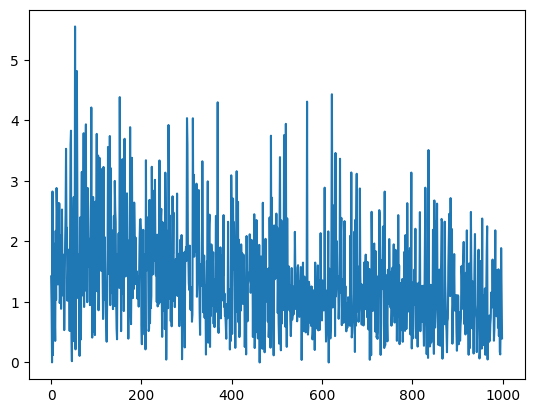

In [57]:
losses = []

X_train, Y_train, X_test, Y_test = fetch_mnist()

with Tensor.train():
  for step in range(1000):
    # random sample a batch
    samp = np.random.randint(0, X_train.shape[0], size=(64))
    batch = Tensor(X_train[samp].reshape(-1, 28*28), requires_grad=False)
    # get the corresponding labels
    labels = Tensor(Y_train[samp])

    # forward pass
    out = net(batch)

    # compute loss
    loss = sparse_categorical_crossentropy(out, labels)

    # zero gradients
    opt.zero_grad()

    # backward pass
    loss.backward()

    # update parameters
    opt.step()

    # calculate accuracy
    pred = out.argmax(axis=-1)
    acc = (pred == labels).mean()

    if step % 100 == 0:
      print(f"Step {step+1} | Loss: {loss.numpy()} | Accuracy: {acc.numpy()}")

    # append loss
    losses.append(min(loss.item(), 10))

plt.plot(losses)

## Evaluation

We will be using the same batch size of 64 and evaluating 1000 of those batches


In [55]:
with Timing("Time: "):
  avg_acc = 0
  for step in range(1000):
    # random sample a batch
    samp = np.random.randint(0, X_test.shape[0], size=(64))
    batch = Tensor(X_test[samp].reshape(-1, 28*28), requires_grad=False)
    # get the corresponding labels
    labels = Y_test[samp]

    # forward pass
    out = net(batch)

    # calculate accuracy
    pred = out.argmax(axis=-1).numpy()
    avg_acc += (pred == labels).mean()
  print(f"Test Accuracy: {avg_acc / 1000}")

Test Accuracy: 0.889046875
Time: 11591.68 ms
